In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv('../Data/cleaned_data.csv')
df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,GPA,GradeClass
0,1001,17,1,Caucasian,Some College,19.833723,7.0,1,Moderate,0,0,1,2.929196,2.0
1,1002,18,0,Caucasian,High School,15.408756,0.0,0,Low,0,0,0,3.042915,1.0
2,1003,15,0,Asian,Bachelor's,4.210570,26.0,0,Moderate,0,0,0,0.112602,4.0
3,1004,17,1,Caucasian,Bachelor's,10.028829,14.0,0,High,1,0,0,2.054218,3.0
4,1005,17,1,Caucasian,Some College,4.672495,17.0,1,High,0,0,0,1.288061,4.0


In [36]:
reg_data = df.copy()

reg_data.drop(columns=['StudentID'])

features = ['Sports','Music','Extracurricular','Tutoring','Gender']
target = ['GPA']

data = df[features + target].dropna(subset=target)
X = data[features].astype(int)
y = data[target[0]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
## TRAINING TIME 😍

reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

LinearRegression()

In [38]:
# Evaluate
y_pred = reg_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
r2

0.024973315169656285

Text(0.5, 1.0, 'Linear Regression Coefficients (GPA ~ selected activities)')

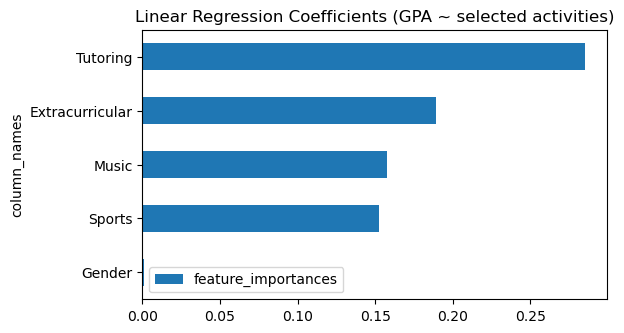

In [40]:
# Plotting
imp_df = pd.DataFrame({'column_names': X.columns, 'feature_importances': reg_model.coef_})
imp_df = imp_df.sort_values('feature_importances', key=abs, ascending=True)

ax = imp_df.plot(kind='barh', x='column_names', figsize=(6,3.5))
ax.set_title('Linear Regression Coefficients (GPA ~ selected activities)')